Ciara Sikking 
Data Mining - Feb. 13, 2024


Cropping and Resize Images in Your 4-class Images Dataset:

In [244]:
# Import necessary packages
import skimage
import xml.etree.ElementTree as ET
import glob
import os
from PIL import Image
from pathlib import Path

# Define bounding boxes method
def get_bounding_boxes(annot):
    xml = annot
    tree = ET.parse(xml)
    root = tree.getroot()
    objects = root.findall('object')
    bbox = []
    for o in objects:
        bndbox = o.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        bbox.append((xmin,ymin,xmax,ymax))
    return bbox

In [245]:
# Define global variables
dog_images = glob.glob('/Users/ciarasikking/Data_Mining_Assignment1/StanfordDogs/Images/*/*')
breeds = glob.glob('/Users/ciarasikking/Data_Mining_Assignment1/StanfordDogs/Annotation/*')
annotations = glob.glob('/Users/ciarasikking/Data_Mining_Assignment1/StanfordDogs/Annotation/*/*')

# Define images method
def get_image(annot):
    img_path = '/Users/ciarasikking/Data_Mining_Assignment1/StanfordDogs/Images/'
    file = annot.split('/')
    img_filename = img_path + file[-2]+'/'+file[-1]+'.jpg'
    return img_filename

# Crop images and save in a new folder titled 'Cropped'
for i in range(len(dog_images)):
    bbox = get_bounding_boxes(annotations[i])
    dog = get_image(annotations[i])
    im = Image.open(dog)
    for j in range(len(bbox)):
        im2 = im.crop(bbox[j])
        im2 = im2.resize((128,128), Image.ANTIALIAS)
        new_path = dog.replace('/Users/ciarasikking/Data_Mining_Assignment1/StanfordDogs/Images/','./Cropped/')
        new_path = new_path.replace('.jpg','-' + str(j) + '.jpg')
        im2=im2.convert('RGB')
        head, tail = os.path.split(new_path)
        Path(head).mkdir(parents=True, exist_ok=True)
        im2.save(new_path)

Image Processing

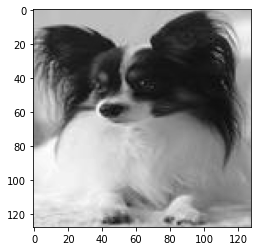

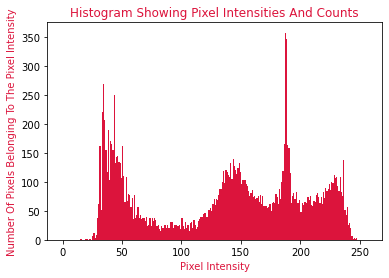

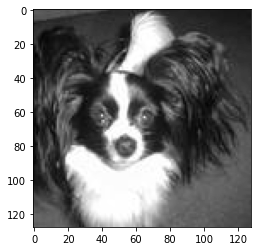

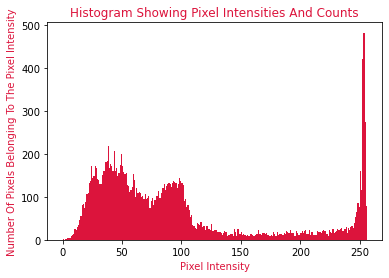

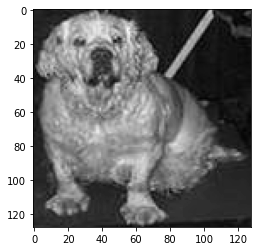

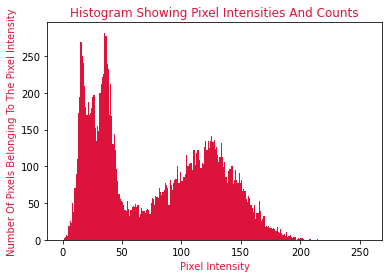

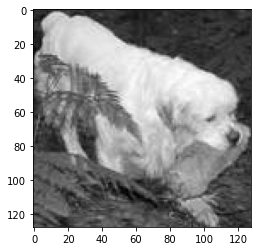

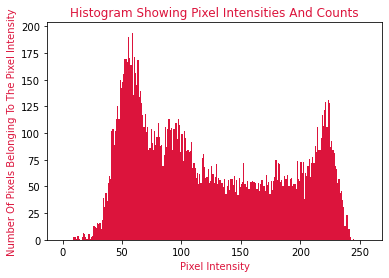

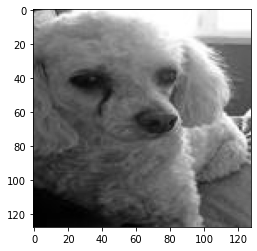

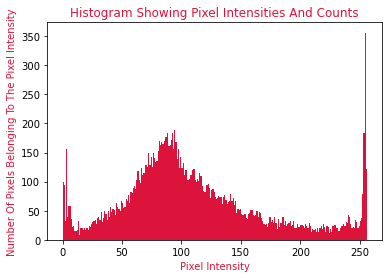

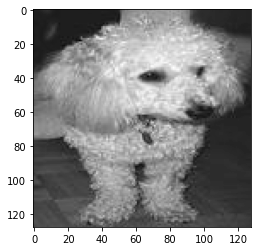

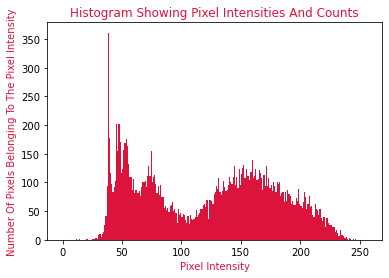

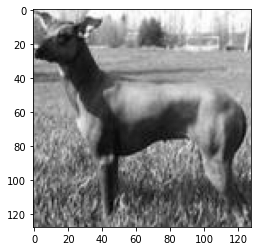

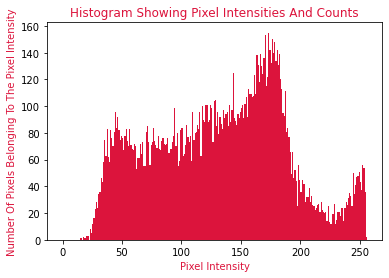

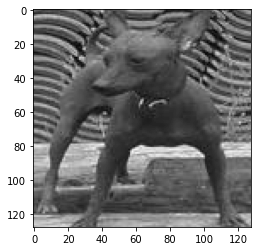

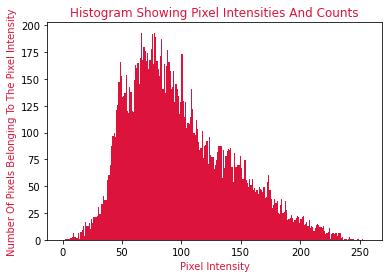

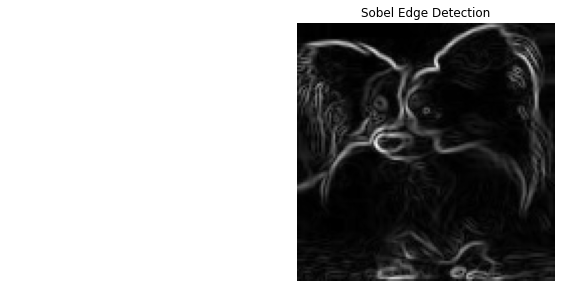

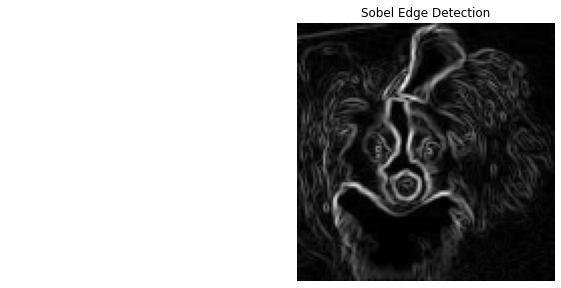

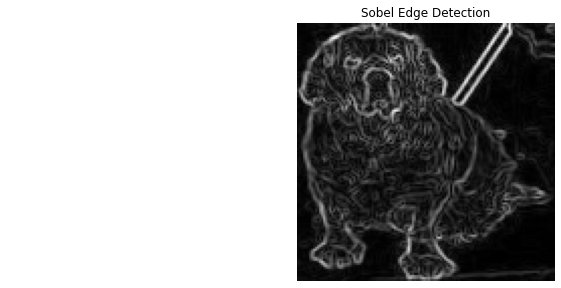

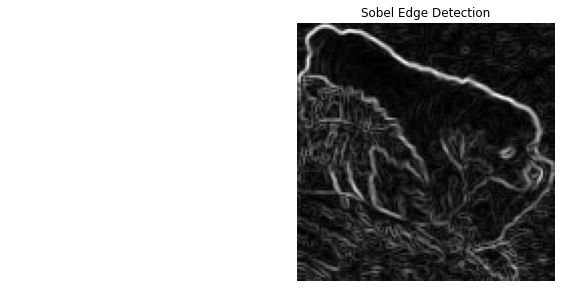

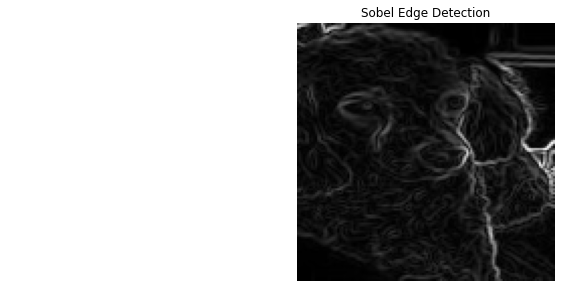

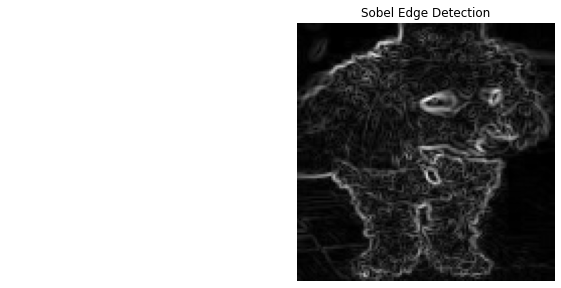

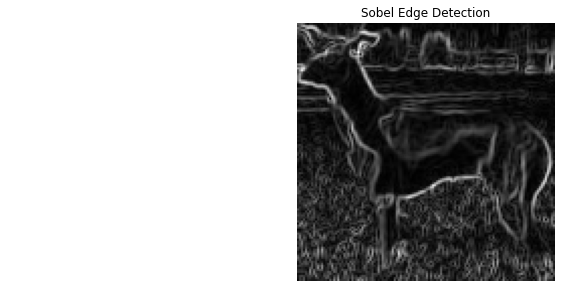

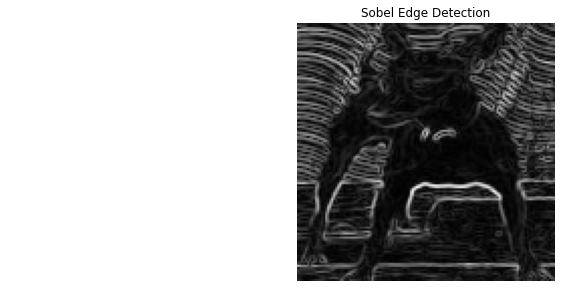

In [246]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters
from skimage.util import compare_images

imgExtension = ['jpg'] 
allImages = list()

def im2gray(img):
    gray = np.dot(img[...,0:3],[0.299,0.587,0.114])
    return gray 

directories = ['/Users/ciarasikking/Data_Mining_Assignment1/Cropped/n02086910-papillon',
              '/Users/ciarasikking/Data_Mining_Assignment1/Cropped/n02101556-clumber',
              '/Users/ciarasikking/Data_Mining_Assignment1/Cropped/n02113712-miniature_poodle',
              '/Users/ciarasikking/Data_Mining_Assignment1/Cropped/n02113978-Mexican_hairless']

i = 0
image_list = []
gray_image_list = []


for directory in directories:
    while i < 2:
        # get a random image path from the directory
        image_path = random.choice(os.listdir(directory))
        image = plt.imread(directory + '/' + image_path)
        image_list.append(directory + '/' + image_path)
        
        # plot the gray image
        gray_image = im2gray(image)
        gray_image_list.append(gray_image)
        plt.imshow(gray_image, cmap = 'gray')
        plt.show()
        
        # plot the histogram of the pixel intensity
        plt.hist(x=gray_image.ravel(), bins=256, range=[0, 256], color='crimson')
        plt.title("Histogram Showing Pixel Intensities And Counts", color='crimson')
        plt.ylabel("Number Of Pixels Belonging To The Pixel Intensity", color="crimson")
        plt.xlabel("Pixel Intensity", color="crimson")
        plt.show()
        
        i = i + 1
    i = 0

# Perform edge detection on above images
for gray in gray_image_list:
    edge_image = gray
    edge_sobel = filters.sobel(edge_image)

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

    axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
    axes[1].set_title('Sobel Edge Detection')

    for ax in axes:
        ax.axis('off')

    plt.tight_layout()
    plt.show()



Edge Histogram

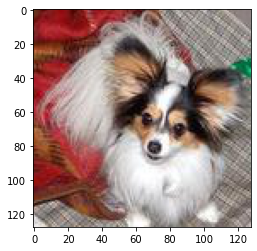

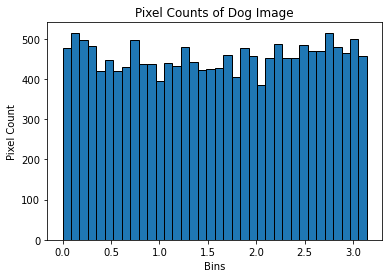

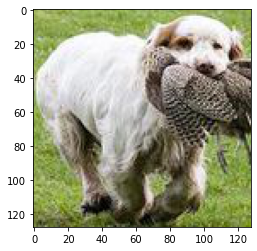

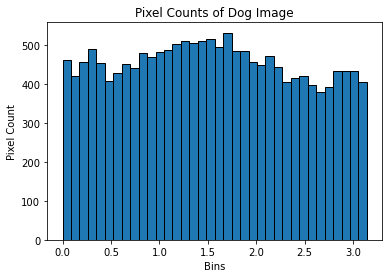

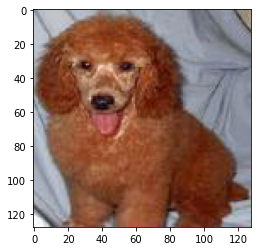

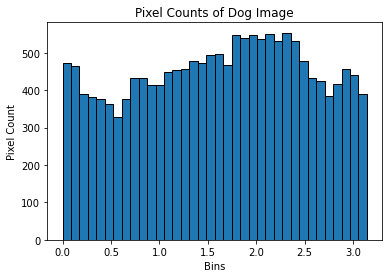

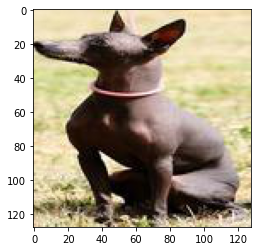

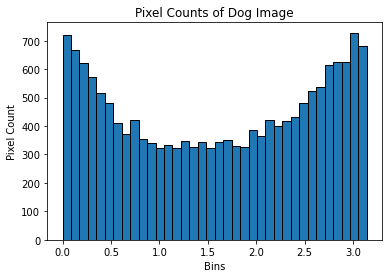

In [247]:
from skimage import filters, exposure
import numpy as np

image_list2 = []
gray_image_list2 = []
angles = []

def angle(dx, dy):
    return np.mod(np.arctan2(dy, dx), np.pi)

for directory in directories:
    # get a random image path from the directory
    image_path = random.choice(os.listdir(directory))
    image = plt.imread(directory + '/' + image_path)
    image_list2.append(image)
    plt.imshow(image)
    plt.show()
        
    # convert the image to gray    
    gray_image = im2gray(image)
    gray_image_list2.append(gray_image)
    
    angle_sobel = angle(filters.sobel_h(gray_image),filters.sobel_v(gray_image))
    angles.append(angle_sobel)
    
    hist, bins = skimage.exposure.histogram(angle_sobel, nbins=36, normalize=False)
    plt.bar(bins, hist, width=np.diff(bins)[0], edgecolor = "black")
    plt.title("Pixel Counts of Dog Image", color='black')
    plt.ylabel("Pixel Count", color='black')
    plt.xlabel("Bins", color='black')
    plt.show()

In [248]:
import math
from numpy.linalg import norm

part_d_images = ['/Users/ciarasikking/Data_Mining_Assignment1/Cropped/n02086910-papillon/n02086910_26-0.jpg',
                 '/Users/ciarasikking/Data_Mining_Assignment1/Cropped/n02086910-papillon/n02086910_103-0.jpg',
                 '/Users/ciarasikking/Data_Mining_Assignment1/Cropped/n02101556-clumber/n02101556_129-0.jpg']

part_d_hist = []
part_d_bins = []

for D in part_d_images:
    im = plt.imread(D)

    gray_image = im2gray(im)
    
    angle_sobel = angle(filters.sobel_h(gray_image),filters.sobel_v(gray_image))    
    
    hist, bins = skimage.exposure.histogram(angle_sobel, nbins=36, normalize=False)
    part_d_hist.append(hist)
    part_d_bins.append(bins)

   
# Euclidean Distance
# Same class
x_same = part_d_hist[0]
y_same = part_d_hist[1]

print('Euclidean Distance between two images from the same class:', math.dist(x_same, y_same))

# Different classes
x_diff = part_d_hist[0]
y_diff = part_d_hist[2]

print('Euclidean Distance between two images from different classes:', math.dist(x_diff, y_diff))



# Manhattan Distance
def manhattan(a, b):
    return sum(abs(val1-val2) for val1, val2 in zip(a,b))

# Same class
first_same = part_d_hist[0]
second_same = part_d_hist[1]

print('Manhattan Distance between two images from the same class:', manhattan(first_same, second_same))

# Different classes
first_diff = part_d_hist[0]
second_diff = part_d_hist[2]

print('Manhattan Distance between two images from different classes:', manhattan(first_diff, second_diff))



# Cosine Similarity
def cosine(A,B):
    cos = np.dot(A,B)/(norm(A)*norm(B))
    return cos

# Same class
r_same = part_d_hist[0]
s_same = part_d_hist[1]

print('Cosine Similarity between two images from the same class:', cosine(r_same, s_same))

# Different class
p_diff = part_d_hist[0]
q_diff = part_d_hist[2]

print('Cosine Similarity between two images from different classes:', cosine(p_diff, q_diff))



Euclidean Distance between two images from the same class: 365.02054736685716
Euclidean Distance between two images from different classes: 488.67780796758103
Manhattan Distance between two images from the same class: 1860
Manhattan Distance between two images from different classes: 2326
Cosine Similarity between two images from the same class: 0.9911756459577538
Cosine Similarity between two images from different classes: 0.9843237338590445


Histogram of Oriented Gradient

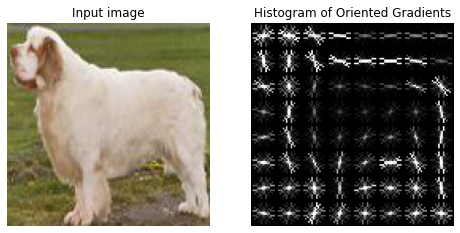

In [249]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
from skimage.io import imread


image = imread('/Users/ciarasikking/Data_Mining_Assignment1/Cropped/n02101556-clumber/n02101556_129-0.jpg')

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

Dimensionality Reduction

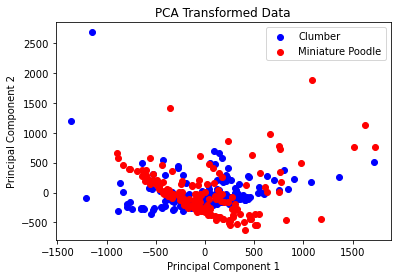

In [250]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import (StandardScaler, MaxAbsScaler, RobustScaler, 
Normalizer, QuantileTransformer, PowerTransformer, MinMaxScaler)
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# Pick two classes 
dir_1 = '/Users/ciarasikking/Data_Mining_Assignment1/Cropped/n02101556-clumber'
dir_2 = '/Users/ciarasikking/Data_Mining_Assignment1/Cropped/n02113712-miniature_poodle'
class_1 = os.listdir(dir_1)
class_2 = os.listdir(dir_2)

edge_hist_list = []
edge_hist_list2 = []

# Convert each image in each class to edge histograms 
for im in class_1:
    read_image = plt.imread(dir_1 + '/' + im)
    gray_image = im2gray(read_image)
    
    angle_sobel = angle(filters.sobel_h(gray_image),filters.sobel_v(gray_image))
    
    hist, bins = skimage.exposure.histogram(angle_sobel, nbins=36, normalize=False)
    edge_hist_list.append(hist)
    
for im2 in class_2:
    read_image2 = plt.imread(dir_2 + '/' + im2)
    gray_image2 = im2gray(read_image2)
    
    angle_sobel2 = angle(filters.sobel_h(gray_image2),filters.sobel_v(gray_image2))
    
    hist2, bins2 = skimage.exposure.histogram(angle_sobel2, nbins=36, normalize=False)
    edge_hist_list2.append(hist2)
    
# Perform PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(edge_hist_list)

pca2 = PCA(n_components = 2)
pca2.fit(edge_hist_list2)


edge_hist_list = pca.transform(edge_hist_list)
edge_hist_list2 = pca2.transform(edge_hist_list2)

plt.scatter(edge_hist_list[:, 0], edge_hist_list[:, 1], color='blue', label='Clumber')

plt.scatter(edge_hist_list2[:, 0], edge_hist_list2[:, 1], color='red', label='Miniature Poodle')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformed Data')
plt.legend()
plt.show()